# Inicializar

In [62]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import sqrt

def somatorio(erros, pontos):
  vetor_x = pontos[:, 0]
  return np.sum(vetor_x * erros)

def criar_potencias(x, tamanho):
  # tamanho final: (n_atributos * P) + 1
  lista = [1]
  aux = np.array(x)
  for val in aux:
    for pot in range(1, tamanho):
      lista.append(val ** pot)
  return np.array(lista)

def calcular_MSE(dataset_x, dataset_y, parametros):
  # parametros = (n_atrib * P) + 1
  N = dataset_x.shape[0]
  n_atrib = dataset_x.shape[1]
  P = (parametros.shape[0] - 1) // n_atrib
  
  X = np.array([criar_potencias(i,P+1) for i in dataset_x]) # (n, P*n_atrib + 1)
  y_barra = parametros @ X.T
  erro = dataset_y - y_barra
  MSE = np.sum(erro**2) / (2*N)
  return MSE


# Normalização

In [63]:
def normalizar(M):
  M_min = np.min(M, axis = 0)
  M_max = np.max(M, axis = 0)
  X = (M - M_min) / (M_max - M_min)
  return (X, M_min, M_max)

def desnormalizar(y_normalizado, y_min, y_max):
  return y_normalizado * (y_max - y_min) + y_min

# Regressões

In [64]:
def gd(pontos_x, pontos_y, alfa, qnt_iteracoes, P = 1, hiperparametro = 0):
  n = pontos_x.shape[0]
  historico_MSE = []

  #X_treino, X_teste, y_treino, y_teste = train_test_split(pontos_x, pontos_y, test_size = 0.7)

  X = np.array([criar_potencias(i,P+1) for i in pontos_x]) # (n, P*n_atrib+1)

  estimacoes_y = np.zeros(n) # (1,n)
  erros_y = np.zeros(n) # (1,n)
  w = np.ones(P+1) # (1, P+1)
  w[0] = 0
  t = 0

  
  for _ in range(qnt_iteracoes):
    t = t + 1

    estimacoes_y = w @ X.T
    erros_y = pontos_y - estimacoes_y
    historico_MSE.append(np.sum(erros_y**2) / (2*n))

    # soma(ERROi{1,n} * Xi{1,n}) > (1,1)
    # soma(ERRO{1,n} * X{n,P+1} , eixo = vertical) > (1,P+1)

    w = w + alfa * (np.sum((erros_y * X.T).T,axis = 0) / n - hiperparametro * w)

  return (w, historico_MSE)


def sgd(pontos_x, pontos_y, alfa, qnt_iteracoes, P = 1, hiperparametro = 0):
  n = pontos_x.shape[0]
  X = np.array([criar_potencias(i,P+1) for i in pontos_x]) # (n, P+1)
  historico_MSE = []

  estimacoes_y = np.zeros(n) # (1,n)
  erros_y = np.zeros(n) # (1,n)
  w = np.ones(P+1) # (1, P+1)
  w[0] = 0
  t = 0

  
  for _ in range(qnt_iteracoes):
    for i in range(n):
      t = t + 1
    
      estimacoes_y[i] = w @ X[i].T
      erros_y[i] = pontos_y[i] - estimacoes_y[i]
      historico_MSE.append(np.sum(erros_y**2) / (2*n))

      w = w + alfa * (erros_y[i]/n * X[i] - hiperparametro * w)

  return (w, historico_MSE)


def ols(vetor_x, vetor_y, P = 1, hiperparametro = 0):
  n_atrib = vetor_x.shape[1]
  n = vetor_x.shape[0]
  X = np.array([criar_potencias(i,P+1) for i in vetor_x]) # (n, P+1)


  w = (np.linalg.inv(X.T @ X + hiperparametro * np.eye((P * n_atrib + 1)))) @ X.T @ vetor_y
  
  return w

# Funções pra plotagem

In [65]:
def plotar_regressao(dataset, parametros):
  dataset_x = dataset[:,:-1]
  dataset_y = dataset[:,-1]
  min_x = min(dataset_x)
  max_x = max(dataset_x)
  P = parametros.shape[0]
  
  # Parametros (1, P)
  intervalos_x = np.linspace(min_x, max_x, 100) # (1,100)
  X = np.array([criar_potencias(i,P) for i in intervalos_x]) # (100, P)
  intervalos_y = parametros @ X.T

  

  # Plotando os pontos
  plt.plot(dataset_x,dataset_y,'o')

  # Plotando a reta
  plt.plot(intervalos_x,intervalos_y)
  plt.show()


# Questões

In [97]:
def primeira_q():
  dataset_q1 = np.genfromtxt('./artificial1d.csv', delimiter=',', skip_header=1)
  dataset_x = dataset_q1[:,:-1]
  dataset_y = dataset_q1[:,-1]

  params_gd, mse_gd = gd(dataset_x, dataset_y, 0.01, 50000, P = 1, hiperparametro = 0.000)
  params_sgd, mse_sgd = sgd(dataset_x, dataset_y, 0.01, 50000, P = 1, hiperparametro = 0.000)
  params_ols = ols(dataset_x, dataset_y, P = 1, hiperparametro = 0.000)

  
  print("--- GD ---")
  print("Parametros:", params_gd)
  print("MSE:", mse_gd[-1])
  plotar_regressao(dataset_q1, params_gd)

  print("--- SGD ---")
  print("Parametros:", params_sgd)
  print("MSE:",  mse_sgd[-1])
  plotar_regressao(dataset_q1, params_sgd)

  print("--- OLS ---")
  print("Parametros:", params_ols)
  print("MSE:", calcular_MSE(dataset_x, dataset_y, params_ols))
  plotar_regressao(dataset_q1, params_ols)


def segunda_q():
  dataset_q2 = np.genfromtxt('./california.csv', delimiter=',', skip_header=0)
  dataset_norm, dataset_min, dataset_max = normalizar(dataset_q2)
  dataset_x = dataset_norm[:,:-1]
  dataset_y = dataset_norm[:,-1]
  y_min = np.min(dataset_y)
  y_max = np.max(dataset_y)

  X_treino, X_teste, y_treino, y_teste = train_test_split(dataset_x, dataset_y, test_size = 0.8)
  plotar_P = list(range(1,14))
  plotar_treino_RMSE = []
  plotar_teste_RMSE = []
  
  print("SEM REGULARIZAÇÃO L2")
  for P_it in range(1,14):
    params_ols = ols(X_treino, y_treino, P = P_it, hiperparametro = 0.00)

    # Treino 
    X = np.array([criar_potencias(i,P_it+1) for i in X_treino])
    n_treino = X_treino.shape[0]
    y_preditos_norm = params_ols @ X.T
    y_preditos = desnormalizar(y_preditos_norm, y_min, y_max)
    RMSE = sqrt( np.sum((y_preditos - y_treino)**2) / (2*n_treino) )
    plotar_treino_RMSE.append(RMSE)

    # Teste
    X = np.array([criar_potencias(i,P_it+1) for i in X_teste])
    n_teste = X_teste.shape[0]
    y_preditos_norm = params_ols @ X.T
    y_preditos = desnormalizar(y_preditos_norm, y_min, y_max)
    RMSE = sqrt( np.sum((y_preditos - y_teste)**2) / (2*n_teste) )
    plotar_teste_RMSE.append(RMSE)

  # Plotando as retas
  plt.plot(plotar_P,plotar_treino_RMSE, color = 'blue', label = 'Treino')
  plt.plot(plotar_P,plotar_teste_RMSE, color = 'red', label = 'Teste')

  plt.legend()
  plt.xlabel('P')
  plt.ylabel('RMSE')

  plt.show()


  print()
  print("COM REGULARIZAÇÃO L2")

  plotar_treino_RMSE = []
  plotar_teste_RMSE = []

  for P_it in range(1,14):
    params_ols = ols(X_treino, y_treino, P = P_it, hiperparametro = 0.01)

    # Treino 
    X = np.array([criar_potencias(i,P_it+1) for i in X_treino])
    n_treino = X_treino.shape[0]
    y_preditos_norm = params_ols @ X.T
    y_preditos = desnormalizar(y_preditos_norm, y_min, y_max)
    RMSE = sqrt( np.sum((y_preditos - y_treino)**2) / (2*n_treino) )
    plotar_treino_RMSE.append(RMSE)

    # Teste
    X = np.array([criar_potencias(i,P_it+1) for i in X_teste])
    n_teste = X_teste.shape[0]
    y_preditos_norm = params_ols @ X.T
    y_preditos = desnormalizar(y_preditos_norm, y_min, y_max)
    RMSE = sqrt( np.sum((y_preditos - y_teste)**2) / (2*n_teste) )
    plotar_teste_RMSE.append(RMSE)

  # Plotando as retas
  plt.plot(plotar_P,plotar_treino_RMSE, color = 'blue', label = 'Treino')
  plt.plot(plotar_P,plotar_teste_RMSE, color = 'red', label = 'Teste')

  plt.legend()
  plt.xlabel('P')
  plt.ylabel('RMSE')

  plt.show()

# Primeira Questão

--- GD ---
Parametros: [0.08956111 1.51328267]
MSE: 0.10385617947308845


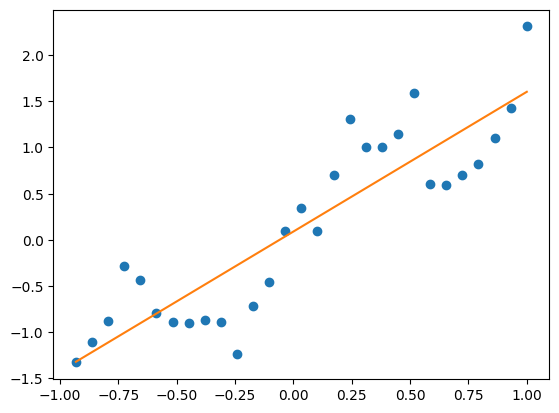

--- SGD ---
Parametros: [0.0895165  1.51349046]
MSE: 0.10390247757159073


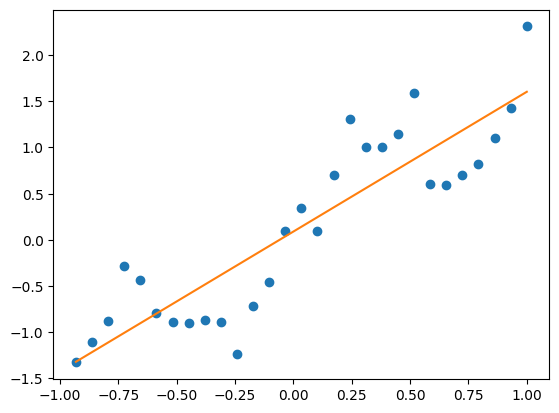

--- OLS ---
Parametros: [0.08956111 1.51328267]
MSE: 0.10385617947308844


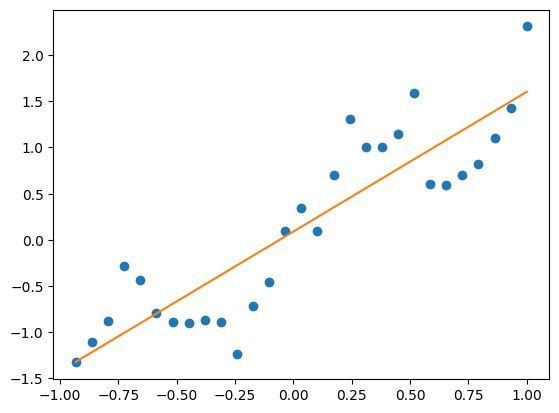

In [99]:
primeira_q()

# Segunda Questão

SEM REGULARIZAÇÃO L2


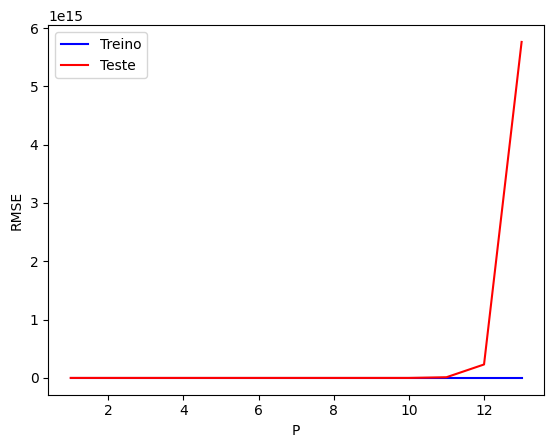


COM REGULARIZAÇÃO L2


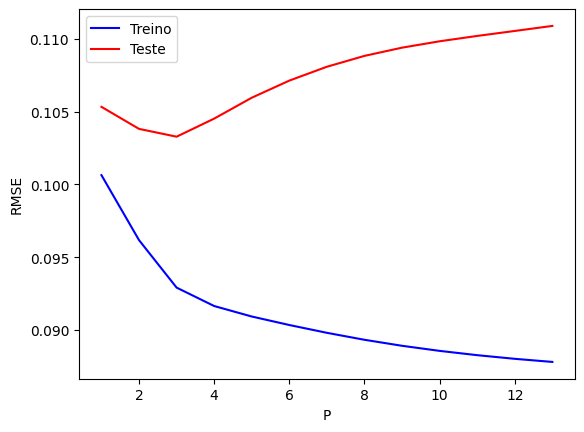

In [101]:
segunda_q()